<a href="https://colab.research.google.com/github/nikhilveldanda/INFO-5731/blob/main/Final_Project/Key_Hashtags_and_Keyword_Extraction_Drug_WAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Key Hashtags

In [7]:
import pandas as pd
from collections import Counter
df1 = pd.read_excel("Top5%.xlsx")
hashtags = []
for i in df1["hashtags extracted"]:
    if str(i).count(",")>0:
        hashtags += [i.strip().strip(".").lower() for i in i.split(",")]
    else:      
      hashtags += [str(i).strip().strip(".").lower()]
freq_dist = Counter( [i for i in hashtags if i!='nan' and i!=''])
sorted_freqdist = sorted(freq_dist.items(),key = lambda x:x[1],reverse=True)
sorted_freqdist[:10]


[('warondrugs', 6319),
 ('liberals', 1705),
 ('buildthewall', 1705),
 ('drugwar', 1056),
 ('legalizeit', 263),
 ('keepyourpromise', 261),
 ('cannabis!!', 261),
 ('bidenactnow', 261),
 ('k9', 260),
 ('police', 260)]

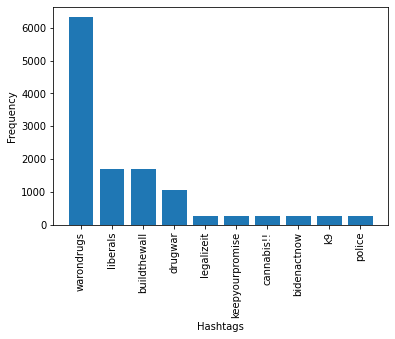

In [8]:
import matplotlib.pyplot as plt
plt.bar([i[0] for i in sorted_freqdist[:10]], [i[1] for i in sorted_freqdist[:10]])
plt.xticks(rotation=90)
plt.xlabel("Hashtags")
plt.ylabel("Frequency")
plt.show()

In [9]:
from wordcloud import WordCloud, STOPWORDS

In [10]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(dict(sorted_freqdist))

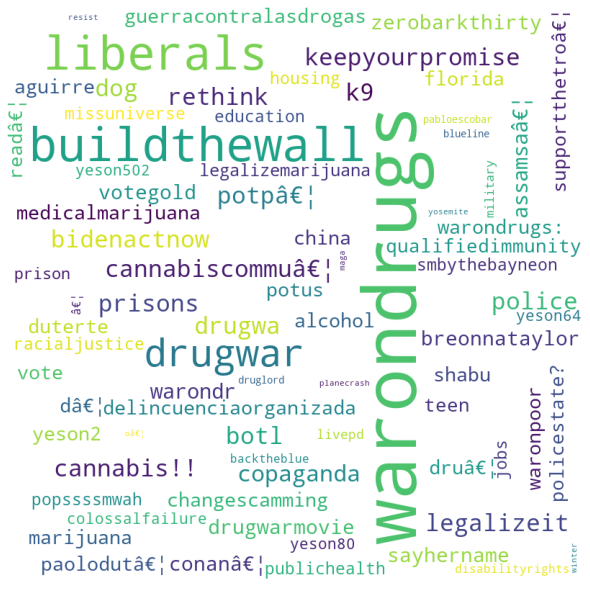

In [11]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Keyword Extraction

In [12]:
import numpy as np 
import pandas as pd

In [13]:
df= pd.read_excel('/content/Top5%.xlsx')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,hashtag,id,created_at,lang,author_id,text,public_metricsretweet_count,public_metricsreply_count,public_metricslike_count,public_metricsquote_count,geoplace_id,hashtags extracted,CleanedTweet,interactionByWeights
0,0,170360,170360,NaN,679000000000000000,2015-12-22T13:13:10.000Z,und,2281731144,RT @MJIndustryNews: http://t.co/xWh0aBhY6S @Th...,5120,0,0,0,NaN,"WarOnDrugs, doj, Heroin, cannabis, dea",it mjindustrynews theweedmann willienelson tom...,15360
1,1,104495,104495,NaN,1040000000000000000,2018-09-02T14:35:51.000Z,en,78523300,The best offense is a good defense. Use the mo...,1894,250,5475,93,NaN,"liberals, DrugWar, IllegalInvasion, BuildTheWall.",the best offense is a good defense use the mon...,11657
2,2,283120,283120,NaN,929000000000000000,2017-11-11T22:24:44.000Z,en,18372616,"Crack vs opioid addiction: 2 epidemics, but tr...",2520,0,13,0,NaN,"DrugWar, Resist, opiodepidemic",crack vs ovoid addition 2 epidemic but treated...,7573
3,3,282693,282693,NaN,931000000000000000,2017-11-16T08:02:07.000Z,en,776000000000000000,RT @movietvtechgeek: Crack vs opioid addiction...,2520,0,0,0,NaN,"oâ€¦, DrugWar, Resist",it movietvtechgeek crack vs ovoid addition 2 e...,7560
4,4,282580,282580,NaN,932000000000000000,2017-11-18T11:35:13.000Z,en,824000000000000000,RT @movietvtechgeek: Crack vs opioid addiction...,2520,0,0,0,NaN,"oâ€¦, DrugWar, Resist",it movietvtechgeek crack vs ovoid addition 2 e...,7560


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14555 entries, 0 to 14554
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   14555 non-null  int64  
 1   Unnamed: 0.1                 14555 non-null  int64  
 2   Unnamed: 0.1.1               14555 non-null  int64  
 3   hashtag                      0 non-null      float64
 4   id                           14555 non-null  int64  
 5   created_at                   14555 non-null  object 
 6   lang                         14555 non-null  object 
 7   author_id                    14555 non-null  int64  
 8   text                         14555 non-null  object 
 9   public_metricsretweet_count  14555 non-null  int64  
 10  public_metricsreply_count    14555 non-null  int64  
 11  public_metricslike_count     14555 non-null  int64  
 12  public_metricsquote_count    14555 non-null  int64  
 13  geoplace_id     

In [15]:
df= df.drop(['Unnamed: 0'],axis=1)
df= df.drop(['Unnamed: 0.1'],axis=1)
df= df.drop(['Unnamed: 0.1.1'],axis=1)

Word Cloud for Keywords

In [16]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [17]:
text = ''
df['CleanedTweet'] = df['CleanedTweet'].fillna('')
for i in df['CleanedTweet']:
  text += str(i)

In [18]:
wordcloud = WordCloud().generate(text)

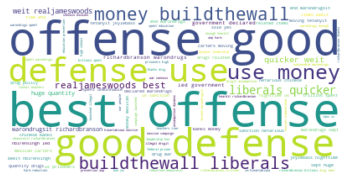

In [19]:
wordcloud = WordCloud(max_font_size=70, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Yake Keyword Extraction

In [20]:
# Applying Keyword Extraction 
!pip install git+https://github.com/LIAAD/yake
import yake
       
# Building Yake model
def fitYAKE (text):
    # Specify parameters
    language = "en"
    max_ngram_size = 3
    deduplication_thresold = 0.9
    deduplication_algo = 'seqm'
    windowSize = 1
    numOfKeywords =40

    # Yake model with specified parameters
    custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size,  dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
    keywords = custom_kw_extractor.extract_keywords(text)
    return keywords

  Cloning https://github.com/LIAAD/yake to /tmp/pip-req-build-ai15kiq8
  Running command git clone -q https://github.com/LIAAD/yake /tmp/pip-req-build-ai15kiq8
     |████████████████████████████████| 137 kB 46.9 MB/s 
  Created wheel for yake: filename=yake-0.4.8-py2.py3-none-any.whl size=60190 sha256=bb077e4285ecc5cf80b00af4d6842730b59c17508c48ecad5ec49cd52e7d3b8b
  Stored in directory: /tmp/pip-ephem-wheel-cache-sw35xjl7/wheels/52/79/f4/dae9309f60266aa3767a4381405002b6f2955fbcf038d804da
  Created wheel for jellyfish: filename=jellyfish-0.8.9-cp37-cp37m-linux_x86_64.whl size=73230 sha256=b46aebab07b77c29ca095a4fd7ff45f0b4370b3e10a9f16c6804ec618a70c40a
  Stored in directory: /root/.cache/pip/wheels/32/a9/ef/5d8742e72deaf0d1de327a180d008c2c0299367581800ea73f
  Created wheel for segtok: filename=segtok-1.5.10-py3-none-any.whl size=25030 sha256=11d7c7faac097182b5c38cba1b67797b914b80a7bb44a7a893ce1d359019e52c
  Stored in directory: /root/.cache/pip/wheels/67/b7/d0/a121106e61339eee5ed083bc2

In [21]:
p = fitYAKE(text)

In [22]:
print(p)

[('richardbranson visited warondrugs', 1.5165147407498307e-08), ('drugs drugwarmovieit richardbranson', 1.7790174856510394e-08), ('warondrugs heit richardbranson', 1.7937370446957134e-08), ('richardbranson billions spent', 1.8638532749924328e-08), ('failed warondrugsit richardbranson', 2.1095504767247794e-08), ('money selling drugs', 2.7344961131039582e-08), ('policies drug war', 2.9756887650229875e-08), ('amp daughtersit richardbranson', 3.609231280350197e-08), ('painless warondrugsit richardbranson', 3.621914277121924e-08), ('mexican carters moving', 3.727873194610522e-08), ('sanction nefarious chinese', 3.7306792924741084e-08), ('keepyourpromise legalized warondrugs', 3.970145089055044e-08), ('legalized warondrugs cannabiscommuit', 4.014646971700822e-08), ('reduction measuresit richardbranson', 4.17783953242343e-08), ('measuresit richardbranson billions', 4.1835331243957e-08), ('drug war photographer', 4.3748415117064896e-08), ('racism policies drug', 4.965567112469218e-08), ('educa

In [23]:
with open('CYakeKeywords.txt','w') as f:
 for t in p:
    f.write(''.join(str(s) for s in t) + '\n')

Word Cloud for Yake Extracted Terms

In [24]:
wordcloud = WordCloud().generate(str(p))

In [25]:
stopwords = set(STOPWORDS)
stopwords.update(['richardbranson'])

In [26]:
print(stopwords)

{"we're", 'into', "they'd", 'yours', "here's", 'until', 'below', "that's", 'yourselves', "you'd", 'also', "he'll", 'under', 'k', 'out', "aren't", 'otherwise', "there's", 'no', "wouldn't", 'other', 'who', 'however', "mustn't", "we'll", 'why', 'she', "couldn't", 'had', 'from', 'against', 'here', "hasn't", 'or', 'with', 'only', 'doing', 'have', "you've", 'some', 'get', 'a', 'be', "haven't", 'own', 'any', 'does', 'what', 'herself', 'we', 'himself', 'above', 'than', 'before', "they've", 'on', "isn't", 'been', 'between', 'has', 'off', 'once', "hadn't", 'then', "can't", 'all', 'ever', 'are', 'whom', "doesn't", 'to', 'since', "how's", 'nor', 'very', "shouldn't", 'by', 'should', "won't", 'because', 'further', 'at', 'as', "you're", 'through', 'cannot', "who's", 'if', 'did', 'is', 'just', "she'll", 'hers', 'this', 'am', 'me', 'up', 'in', 'so', "i'll", 'its', 'do', 'itself', 'r', 'each', "wasn't", "shan't", 'ourselves', 'which', 'it', 'they', 'your', 'how', 'was', "why's", 'our', 'after', 'having'

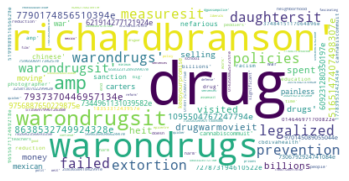

In [27]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=70, background_color="white").generate(str(p))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Rake Keyword Extraction

In [28]:
import nltk
!pip install python-rake

In [29]:
import RAKE
!pip install rake-nltk

     |████████████████████████████████| 1.5 MB 35.0 MB/s 
     |████████████████████████████████| 749 kB 57.9 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [30]:
from rake_nltk import Rake

In [31]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [32]:
rake_nltk_var = Rake()

In [33]:
rake_nltk_var.extract_keywords_from_text(str(text))

In [34]:
keyword_extracted = rake_nltk_var.get_ranked_phrases()
print(keyword_extracted)

['à ¦¨ à §° à ¦§ à §° à ¦£ à ¦• à §° à ¦¬ à ¦ ²à ¦— à ¦¬ à ¦• à ¦¤ à ¦¯ à ¦“ à ¦‡ à ¦¯ à ¦• à ¦… à ¦¤ à ¦• à §° à ¦® à ¦¨ à ¦• à §° à ¦¬ à ¦® à ¦¨ à ¦¤ à §° à ¦– à ¦¬ à ¦¡ à §° à ¦— à ¦› à ¦• à §± à ¦ ² à ¦† à ¦ ªà ¦¨ à ¦• à ¦¨ à ¦ ¹à ¦¯ à ¦† à ¦ ªà ¦¨ à §° à ¦ ªà §° à ¦¯ à ¦ œà ¦¨ à ¦• à ¦• à ¦· à ¦¤ à ¦• à §° à ¦¬ à ¦ œà §± à ¦¨ à ¦ ÿ à ¦‰ à ¦ ªà ¦\xad à ¦— à ¦• à §° à ¦• à ¦¡ à §° à ¦— à ¦› à ¦• à ¦¨ à ¦ ¹à ¦¯ warondrugs assamsaysnotodrugsit richardbranson', 'à ¦¨ à §± à §° warondrugs assamsait dgpassampolice à ¦¨ à ¦® à ¦¬ à §° à ¦ ÿ à ¦® à ¦¨ à ¦¤ à §° à ¦– à ¦¬ à ¦• à §° à ¦£ à ¦† à ¦ ªà ¦¨ à §° à ¦¸ à ¦ ¹à ¦¯ à §° à ¦… à ¦¬ à ¦ ¹à ¦¨ à ¦† à ¦® à §° à ¦¡ à §° à ¦— à ¦ š à ¦¬ à §° à ¦§ à ¦… à ¦\xad à ¦¯ à ¦¨ à ¦• à ¦¤ à ¦¯ à ¦“ à ¦¸ à ¦« à ¦ ²', 'à ¦¨ à §± à §° warondrugs assamsait dgpassampolice à ¦¨ à ¦® à ¦¬ à §° à ¦ ÿ à ¦® à ¦¨ à ¦¤ à §° à ¦– à ¦¬ à ¦• à §° à ¦£ à ¦† à ¦ ªà ¦¨ à §° à ¦¸ à ¦ ¹à ¦¯ à §° à ¦… à ¦¬ à ¦ ¹à ¦¨ à ¦† à ¦® à §° à ¦¡ à §° à ¦— à ¦ š à ¦¬ à §° à ¦§ à ¦… 

In [35]:
from collections import Counter
keywords = []
for i in  (keyword_extracted):
  keywords += i.split(" ")

In [36]:
keywords =  list(filter(lambda s:any([c in "qwertyuiopasdfghjklzxcvbnm1234567890QWERTYUIOPASDFGHJKLZXCVBNM" for c in s]), keywords))

In [37]:
freq_keyword_dict = Counter(keywords)

In [38]:
freq_keyword_dict.pop('richardbranson')

3645

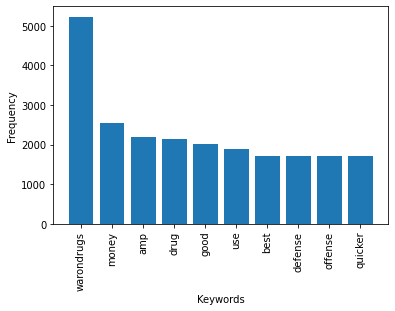

In [39]:
sorted_freqdist = sorted(freq_keyword_dict.items(),key = lambda x:x[1],reverse=True)
sorted_freqdist[:10]
plt.bar([i[0] for i in sorted_freqdist[:10]], [i[1] for i in sorted_freqdist[:10]])
plt.xticks(rotation=90)
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.show()

In [40]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(Counter(keywords))
 

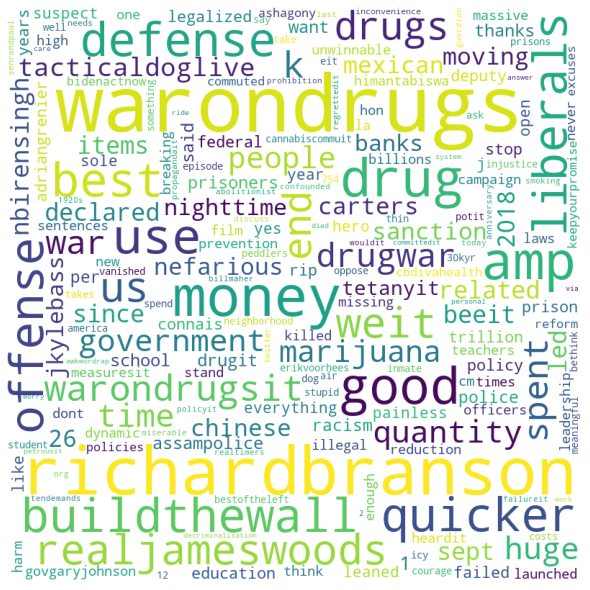

In [41]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Bert

In [42]:
pip install keybert

     |████████████████████████████████| 78 kB 6.0 MB/s 
     |████████████████████████████████| 214 kB 46.2 MB/s 
     |████████████████████████████████| 51 kB 6.8 MB/s 
     |████████████████████████████████| 3.1 MB 41.3 MB/s 
     |████████████████████████████████| 3.3 MB 28.7 MB/s 
     |████████████████████████████████| 1.2 MB 51.1 MB/s 
     |████████████████████████████████| 61 kB 534 kB/s 
     |████████████████████████████████| 596 kB 57.4 MB/s 
     |████████████████████████████████| 895 kB 65.6 MB/s 
  Created wheel for keybert: filename=keybert-0.5.0-py3-none-any.whl size=20491 sha256=06b5b0611865c1843ea8ff7edfa3a0d104fc67f40fd4fc42c327ec5860f0a8a4
  Stored in directory: /root/.cache/pip/wheels/99/1f/3f/590d2997adbb2d0e1f82e8ee05d42d6910e92c3ed283015ff8
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=56d8812c37d50fa9efb2a501805d4c0129b01107300de93e1e85ff88936c7fca
  Stored in directory: /root/.cache/pip/whee

In [43]:
from keybert import KeyBERT

In [44]:
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 2), top_n= 40 )

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [45]:
print(keywords)

[('drugwar illegalinvasion', 0.5223), ('drugwar policies', 0.52), ('government drugwartwitter', 0.4982), ('libertarianparty drugwar', 0.4972), ('vs heroin', 0.4953), ('legalized drugwar', 0.4947), ('drugs drugwarmovieawful', 0.4941), ('drugs drugwarmovieit', 0.4941), ('warondrugs drugwarmoviepolice', 0.4905), ('drugwar oitnb', 0.489), ('drugwar drugs', 0.4886), ('drugwar dispensaries', 0.4884), ('opposition drugwar', 0.4876), ('drugwar justice', 0.4872), ('drugwar drug', 0.4819), ('drugwar oit', 0.4817), ('drugwar stopthekillings', 0.4787), ('drugwar arrests', 0.4762), ('declaring drugwar', 0.4757), ('drugwar propagandait', 0.4747), ('drugwar war', 0.4747), ('war drugwar', 0.4745), ('check drugwar', 0.4701), ('drugwar racialjustice', 0.4692), ('resist drugwar', 0.4659), ('drugs drugwarmoviedurham', 0.4651), ('drugwar propaganda', 0.4644), ('spread drugwar', 0.4618), ('drug war', 0.4616), ('drugwar', 0.4611), ('stop drugwar', 0.4582), ('better drug', 0.4573), ('country drugwar', 0.4561)

In [46]:
with open('CBertKeywords.txt','w') as f:
 for r in keywords:
   f.write(''.join(str(s) for s in r) + '\n')

Bert Word Cloud

In [47]:
wordcloud = WordCloud().generate(str(keywords))

In [48]:
stopwords.update(['richardbranson','drug','drugs','drugwar'])

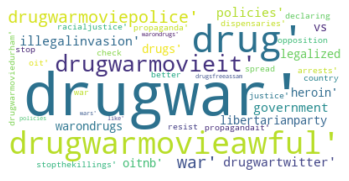

In [49]:
wordcloud = WordCloud( stopwords = stopwords, max_font_size=70, background_color="white").generate(str(keywords))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()